In [1]:
from library import *

Library imports successful


https://www.kaggle.com/datasets/START-UMD/gtd

https://www.start.umd.edu/sites/default/files/2024-10/Codebook.pdf


In [2]:
def open_load_df():
    df = pd.read_csv('../data/globalterrorismdb_0718dist.csv')
    df = df.copy()
    return df

df = open_load_df()

C:\Users\hungh\AppData\Local\Temp\ipykernel_23756\2397569251.py:2: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/globalterrorismdb_0718dist.csv')


In [82]:
df.sample(5)

,eventid,Year,Month,iday,approxdate,extended,resolution,country,Country,region,...,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,ismilitary
129934,201404070021,2014,4,7,NaN,0,NaN,95,Iraq,10,...,"""6 killed, 28 wounded in insurgent attacks in ...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN,1
40644,198911180010,1989,11,18,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,PGIS,-9,-9,0,-9,NaN,1
40921,198912140002,1989,12,14,NaN,0,NaN,183,South Africa,11,...,NaN,NaN,NaN,PGIS,-9,-9,0,-9,NaN,0
92598,200907030001,2009,7,3,NaN,0,NaN,4,Afghanistan,6,...,"National Counterterrorism Center, ""2One Civili...","Pajhwok Afghan News, ""Violence Claims Four Liv...",NaN,ISVG,-9,-9,0,-9,NaN,0
98731,201010220012,2010,10,22,NaN,0,NaN,160,Philippines,5,...,"GMA News, ""Ambush Leaves Cagayan Vice-Governor...","Philippine Daily Inquirer, �Driver Killed in A...",NaN,ISVG,-9,-9,0,-9,NaN,0


In [3]:
def info_dtypes(df):

    num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    cat_cols = df.select_dtypes(include=['object']).columns.tolist()

    num_cols_count = df[num_cols].dtypes.count()
    cat_cols_count = df[cat_cols].dtypes.count()

    print(f"Dtypes: \n{df.dtypes.value_counts()}\n")
    print(f"Numerical Columns: {num_cols_count}")
    print(f"Categorical Columns: {cat_cols_count}")

    return num_cols, cat_cols

num_cols, cat_cols = info_dtypes(df)

Dtypes: 
object     58
float64    55
int64      22
Name: count, dtype: int64

Numerical Columns: 77
Categorical Columns: 58


In [4]:
def summarize_columns(df, num_cols, cat_cols, chunk_size=10):
        print(f"Numerical Columns: {len(num_cols)}")
        for i in range(0, len(num_cols), chunk_size):
            print(", ".join(num_cols[i:i+chunk_size]))

        print(f"\nCategorical Columns: {len(cat_cols)}")
        for i in range(0, len(cat_cols), chunk_size):
            print(", ".join(cat_cols[i:i+chunk_size]))

summarize_columns(df, num_cols, cat_cols)

Numerical Columns: 77
eventid, iyear, imonth, iday, extended, country, region, latitude, longitude, specificity
vicinity, crit1, crit2, crit3, doubtterr, alternative, multiple, success, suicide, attacktype1
attacktype2, attacktype3, targtype1, targsubtype1, natlty1, targtype2, targsubtype2, natlty2, targtype3, targsubtype3
natlty3, guncertain1, guncertain2, guncertain3, individual, nperps, nperpcap, claimed, claimmode, claim2
claimmode2, claim3, claimmode3, compclaim, weaptype1, weapsubtype1, weaptype2, weapsubtype2, weaptype3, weapsubtype3
weaptype4, weapsubtype4, nkill, nkillus, nkillter, nwound, nwoundus, nwoundte, property, propextent
propvalue, ishostkid, nhostkid, nhostkidus, nhours, ndays, ransom, ransomamt, ransomamtus, ransompaid
ransompaidus, hostkidoutcome, nreleased, INT_LOG, INT_IDEO, INT_MISC, INT_ANY

Categorical Columns: 58
approxdate, resolution, country_txt, region_txt, provstate, city, location, summary, alternative_txt, attacktype1_txt
attacktype2_txt, attacktype3_t

In [5]:
def dupl_check(df):
    print(f"Data: {(df.shape)}")
    print(f"Duplicates: {df.duplicated().sum()}")
    df = df.drop_duplicates()
    print(f"Data After Dropping Duplicates: {(df.shape)}")

df_eda= dupl_check(df)

Data: (181691, 135)
Duplicates: 0
Data After Dropping Duplicates: (181691, 135)


In [51]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
def check_null_values(df):
    null_count = df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)
    return null_count

check_null_values(df).sample(20)

hostkidoutcome_txt    170700
weapsubtype2_txt      170149
corp2                 171574
natlty2               170863
weaptype3             179828
nhostkidus            168174
corp3                 180665
nkillus                64446
targtype2_txt         170547
weapsubtype4          181621
claimmode2_txt        181075
ransomamtus           181128
gsubname              175801
propextent            117626
ndays                 173567
longitude               4557
city                     435
ransomamt             180341
attacktype2           175377
gname3                181367
dtype: int64

#### Data Manipulation, EDA  

In [7]:
def data_man(df):
    # Renaming Columns to use for ML model
    rename_cols = df.rename(columns={'iyear': 'Year', 'imonth': 'Month', 'country_txt': 'Country', 'region_txt': 'Region', 'attacktype1_txt': 'Attack_Type'
                        , 'weaptype1_txt': 'Weapon_Type', 'natlty1_txt': 'Nationality'})
    df = rename_cols
    # Mapping: 1 - Yes (Military); 0 - Everything Else
    df['ismilitary'] = df['targtype1_txt'].apply(lambda x: 1 if x == 'Military' else 0)
    print(df['ismilitary'].value_counts())
    return df

df = data_man(df)

ismilitary
0    153707
1     27984
Name: count, dtype: int64


In [49]:
label_font = {'fontsize': 14, 'fontname': 'Arial'}
title_font = {'fontsize': 18, 'fontname': 'Arial'}
subtitle_font = {'fontsize': 15, 'fontname': 'Arial'}

C:\Users\hungh\AppData\Local\Temp\ipykernel_23756\3834231333.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:steelblue'` for the same effect.

  ax = sns.countplot(data = df, x = 'ismilitary', hue='success', color='steelblue')
C:\Users\hungh\AppData\Local\Temp\ipykernel_23756\3834231333.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Non-Military', 'Military'])


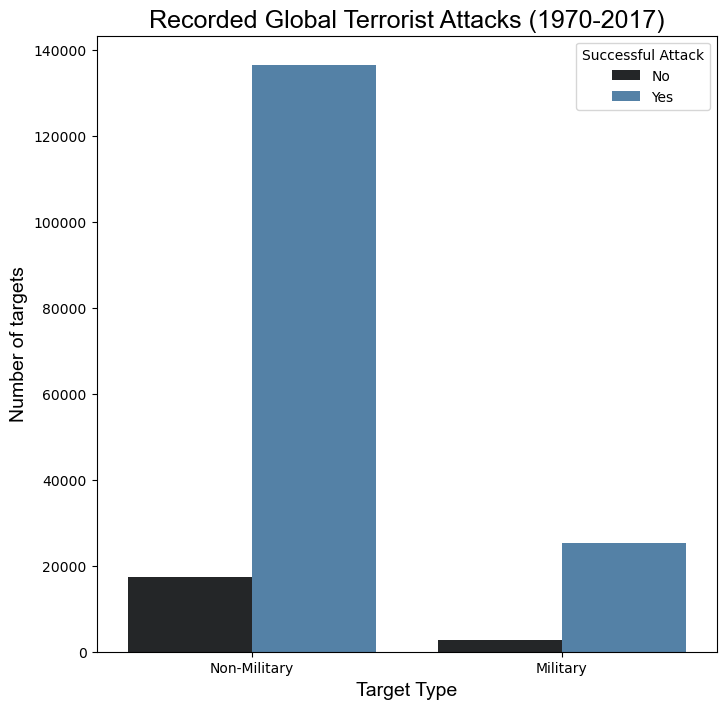

In [63]:
fig, ax = plt.subplots(figsize=(8,8))
ax = sns.countplot(data = df, x = 'ismilitary', hue='success', color='steelblue')

ax.set_xlabel('Target Type', label_font)
ax.set_xticklabels(['Non-Military', 'Military'])
ax.set_ylabel('Number of targets', label_font)
ax.set_title('Recorded Global Terrorist Attacks (1970-2017)', title_font)

# 🔹 Change legend labels
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['No', 'Yes'], title='Successful Attack')
plt.show()

fig.savefig(
    "../img/recorded_mil_atk.png", 
    dpi=300,                               
    bbox_inches='tight',                  
    transparent=False
)

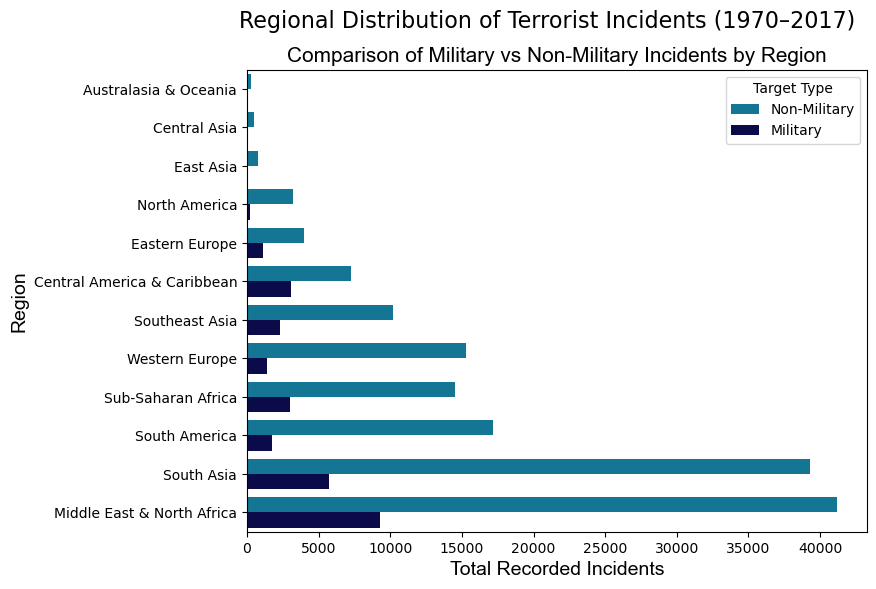

In [ ]:
order = df['Region'].value_counts().sort_values().index

fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(
    data=df,
    y='Region',
    hue='ismilitary',
    palette=["#6A3D9A", "#B0B0B0"],
    order=order
)
ax.set_title("Comparison of Military vs Non-Military Incidents by Region" , subtitle_font)
fig.suptitle("Regional Distribution of Terrorist Incidents (1970–2017)", fontsize = 16 )
ax.set_xlabel("Total Recorded Incidents", label_font)
ax.set_ylabel("Region", label_font)

# Change legend labels and position
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Non-Military', 'Military'], title='Target Type', loc='upper right')
plt.show()

fig.savefig(
    "../img/terrorist_incidents_by_region.png", 
    dpi=300,                               
    bbox_inches='tight',                  
    transparent=False
)


In [55]:
# Copy dataframe
encoded_df = df.copy()

# Encode categorical columns
for col in ['Region', 'Attack_Type', 'Weapon_Type']:
    encoded_df[col] = LabelEncoder().fit_transform(encoded_df[col])

# Now correlation works
features_cols = ['Year', 'Month', 'Region', 'Attack_Type', 'Weapon_Type', 'ismilitary', 'success']
features_df = encoded_df[features_cols]
features_matrix = features_df.corr().round(2)
print(features_matrix)


             Year  Month  Region  Attack_Type  Weapon_Type  ismilitary  \
Year         1.00   0.00    0.05         0.06        -0.07        0.05   
Month        0.00   1.00   -0.01         0.01         0.01        0.00   
Region       0.05  -0.01    1.00         0.04         0.04       -0.10   
Attack_Type  0.06   0.01    0.04         1.00         0.50       -0.06   
Weapon_Type -0.07   0.01    0.04         0.50         1.00        0.02   
ismilitary   0.05   0.00   -0.10        -0.06         0.02        1.00   
success     -0.08  -0.00   -0.03        -0.00         0.04        0.02   

             success  
Year           -0.08  
Month          -0.00  
Region         -0.03  
Attack_Type    -0.00  
Weapon_Type     0.04  
ismilitary      0.02  
success         1.00  


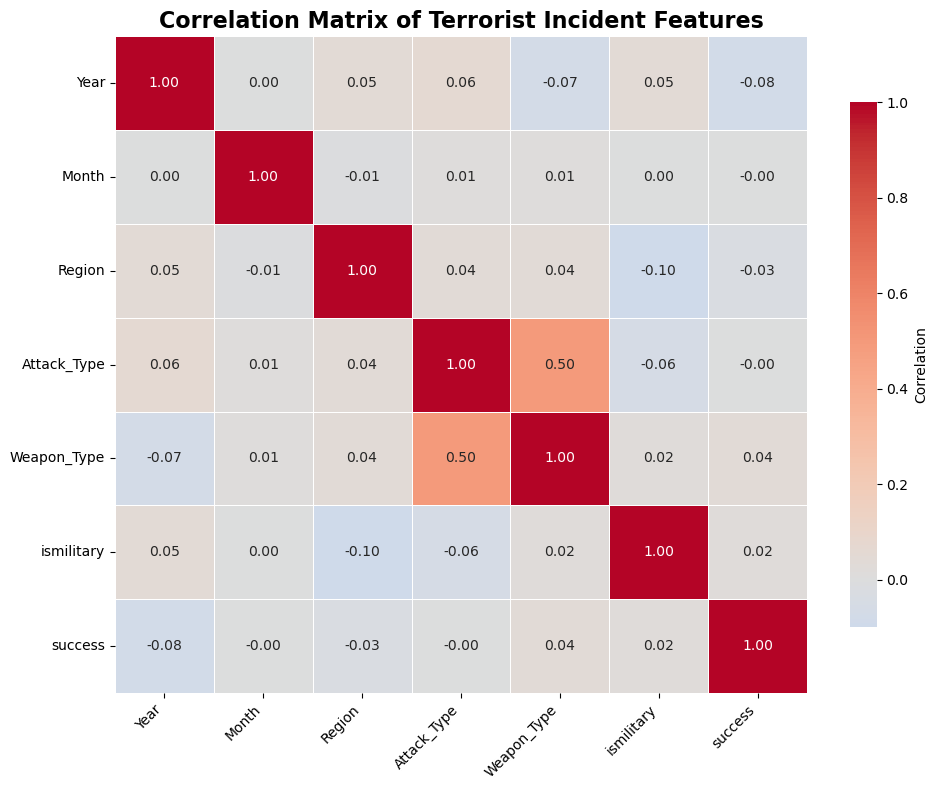

In [56]:
# ---- Step 3: Correlation matrix ----
corr_matrix = features_df.corr().round(2)

# ---- Step 4: Plot heatmap ----
plt.figure(figsize=(10,8))
sns.heatmap(
    corr_matrix,
    annot=True,           # show correlation values
    fmt=".2f",            # 2 decimal places
    cmap="coolwarm",      # color map
    center=0,             # center colormap at 0
    linewidths=0.5,       # lines between cells
    cbar_kws={"shrink": 0.8, "label": "Correlation"}  # colorbar
)

plt.title("Correlation Matrix of Terrorist Incident Features", fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### Statify 
Success to Fail Attack: 9 to 1 unbalanced

Our target ['success'] holds unbalance distribution toward to 1 (attack went successful) than 0 (fail); 
hence, statify = y help with train/test set by giving more weight to class 0. 

Classification → use stratify=y (always safe).
Regression: Not recommended

In [60]:
# 3. Create X, y AFTER cleaning
X = df[['Year', 'Month', 'Country', 'Region', 'Attack_Type',
        'Weapon_Type', 'ismilitary', 'Nationality']]
y = df['success']

In [61]:
df[X.columns].sample(5)

,Year,Month,Country,Region,Attack_Type,Weapon_Type,ismilitary,Nationality
81262,2006,8,Iraq,Middle East & North Africa,Bombing/Explosion,Explosives,0,Iraq
20675,1984,1,Spain,Western Europe,Facility/Infrastructure Attack,Incendiary,0,Spain
19638,1983,8,Colombia,South America,Armed Assault,Firearms,1,Colombia
178950,2017,9,Somalia,Sub-Saharan Africa,Assassination,Firearms,0,Somalia
128395,2014,3,Iraq,Middle East & North Africa,Bombing/Explosion,Explosives,1,Iraq


In [62]:
print(df[X.columns].isnull().sum())

Year              0
Month             0
Country           0
Region            0
Attack_Type       0
Weapon_Type       0
ismilitary        0
Nationality    1559
dtype: int64


In [63]:
y.value_counts()

success
1    161632
0     20059
Name: count, dtype: int64

### Building the ML model with pipeline
    MVP: Predict if a terrorist attack will succeed or not (binary). (Classification)

Format:
Preprocessor -> Model _> Saving Model

Note: Lingear Regression doesn't produce a good R2 score. 

### Logistic Regression

In [64]:
def pipeline_preprocessor():
    #1. Load Dataset
    df = pd.read_csv('../data/globalterrorismdb_0718dist.csv')
    df = df.copy()

    #2. Data Cleaning
    df = df.rename(columns={'iyear': 'Year', 'imonth': 'Month', 'country_txt': 'Country', 'region_txt': 'Region', 
                            'attacktype1_txt': 'Attack_Type', 'weaptype1_txt': 'Weapon_Type', 'natlty1_txt': 'Nationality'})
    
    # Mapping
    df['ismilitary'] = df['targtype1_txt'].apply(lambda x: 1 if x == 'Military' else 0)

    # 3. Selecting Features and Target
    X = df[['Year', 'Month', 'Country', 'Region', 'Attack_Type',
            'Weapon_Type', 'ismilitary', 'Nationality']]
    y = df['success']

    # 4. Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y)

    # 5. Identify numeric vs categorical columns
    numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical_features = X.select_dtypes(include=['object']).columns.tolist()

    # 6. Transform pipelines
    numeric_transformer = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="mean")),
        ("scaler", MinMaxScaler())
        ])
    
    categorical_transformer = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy='constant', fill_value='Unknown')),  # fill missing first (Nationality)
        ("onehot", OneHotEncoder(sparse_output=False, handle_unknown="ignore"))
        ])

    # 7. Column transformer
    preprocessor = ColumnTransformer(transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
        ])
    
    return preprocessor, X_train, X_test, y_train, y_test

preprocessor, X_train, X_test, y_train, y_test = pipeline_preprocessor()

C:\Users\hungh\AppData\Local\Temp\ipykernel_8964\3690624307.py:3: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/globalterrorismdb_0718dist.csv')


In [65]:
def fit_log_reg(preprocessor, X_train, X_test, y_train, y_test):
    log_reg_model = Pipeline([
        ('preprocess', preprocessor),
        ('model', LogisticRegression(solver='saga'))
        ])

    # 9. Fit model
    log_reg_model.fit(X_train, y_train)
    log_score = log_reg_model.score(X_test, y_test)
    y_pred_lr = log_reg_model.predict(X_test)

    print(f"Logisitic Regression Score: {log_score:.4f}")
    print(f"Logisitic Regression Accurary: {log_score *100:.2f}")
    return log_reg_model, log_score, y_pred_lr

log_reg_model, log_score, y_pred_lr = fit_log_reg(preprocessor, X_train, X_test, y_train, y_test)

Logisitic Regression Score: 0.8929
Logisitic Regression Accurary: 89.29


In [66]:
def get_log_reg_coeff(log_reg_model, log_score):
    # Get feature names from preprocessor
    feature_names = log_reg_model.named_steps["preprocess"].get_feature_names_out()

    # Clean feature names: remove "num__" and "cat__"
    clean_feature_names = [name.split("__", 1)[1] for name in feature_names]

    # Extract coefficients from the logistic regression model inside the pipeline
    coefficients = log_reg_model.named_steps["model"].coef_[0]

    # Combine into a DataFrame
    coef_df = pd.DataFrame({
        "Feature": clean_feature_names,
        "Coefficient": coefficients
    }).sort_values("Coefficient", ascending=False)

    print("\n--- Logistic Regression Coefficients ---")
    print(coef_df.head(15))
    return coef_df

log_reg_coeff = get_log_reg_coeff(log_reg_model, log_score)


--- Logistic Regression Coefficients ---
                                               Feature  Coefficient
222    Attack_Type_Hostage Taking (Barricade Incident)     1.985228
364                                Nationality_Myanmar     1.240783
177                                 Country_Tajikistan     1.212542
332                                  Nationality_Kenya     1.174264
232                                  Weapon_Type_Melee     1.115871
266                               Nationality_Cambodia     1.110894
175                                      Country_Syria     1.108192
230                               Weapon_Type_Firearms     1.095217
237  Weapon_Type_Vehicle (not to include vehicle-bo...     1.057656
315                               Nationality_Honduras     1.037582
129                                  Country_Nicaragua     1.015010
140                                       Country_Peru     0.976876
223            Attack_Type_Hostage Taking (Kidnapping)     0.965372
40    

In [79]:
# Save the model to a file
lg_metadata = {
    "model_name": "lg_terrorist_success_rate",
    "trained_date": "2025-12-12",
    "training_data_description": (
        "Predicting a terrorist attack's success rate based on "
        "Year, Month, Country, Region, Attack_Type, Weapon_Type, "
        "ismilitary, and Nationality"
    ),
    "accuracy": 0.89,
    "author": "Hung Nguyen"
}

# Save the model and metadata to a file
joblib.dump({'model': log_reg_model, 'metadata': lg_metadata}, 'model/lg_terrorist_success_rate.joblib')
print("Logisitic Regression saved successfully with metadata.")

Logisitic Regression saved successfully with metadata.


### Random Forrest Classification

In [68]:
def fit_rfc_model(preprocessor, X_train, X_test, y_train, y_test):
    rfc_model = Pipeline([
        ('preprocess', preprocessor),
        ('model', RandomForestClassifier())
        ])

    # 9. Fit model
    rfc_model.fit(X_train, y_train)
    rfc_score = rfc_model.score(X_test, y_test)
    y_pred_rfc = rfc_model.predict(X_test)

    print(f"Random Forest Classification R^2 Score: {rfc_score:.4f}")
    print(f"Random Forest Classification Accurary: {rfc_score *100:.2f}")
    return rfc_model, rfc_score, y_pred_rfc

rfc_model, rfc_score, y_pred_rfc = fit_rfc_model(preprocessor, X_train, X_test, y_train, y_test)

Random Forest Classification R^2 Score: 0.8911
Random Forest Classification Accurary: 89.11


In [69]:
def get_rfc_feat(rfc_model, rfc_score):
    feature = rfc_model.named_steps["preprocess"].get_feature_names_out()
    # Clean names (optional)
    clean_names = [name.split("__", 1)[1] for name in feature]

    # 3. Get feature importances from the RandomForest model
    importances = rfc_model.named_steps["model"].feature_importances_

    # 4. Build a DataFrame
    rfc_importance_df = pd.DataFrame({
        "Feature": clean_names,
        "Importance": importances}).sort_values("Importance", ascending=False)

    print("Random Forrest Classification Coefficients")
    print(rfc_importance_df.head(10))
    return rfc_importance_df


rfc_coeff = get_rfc_feat(rfc_model, rfc_score)


Random Forrest Classification Coefficients
                                     Feature  Importance
0                                       Year    0.329054
1                                      Month    0.273857
218                Attack_Type_Assassination    0.045791
228                   Weapon_Type_Explosives    0.026206
2                                 ismilitary    0.025980
219            Attack_Type_Bombing/Explosion    0.017927
230                     Weapon_Type_Firearms    0.015323
217                Attack_Type_Armed Assault    0.012780
435                      Nationality_Unknown    0.011457
223  Attack_Type_Hostage Taking (Kidnapping)    0.009417


In [78]:
# Save the model to a file
rfc_metadata = {
    "model_name": "rfc_terrorist_success_rate",
    "trained_date": "2025-12-12",
    "training_data_description": (
        "Predicting a terrorist attack's success rate based on "
        "Year, Month, Country, Region, Attack_Type, Weapon_Type, "
        "ismilitary, and Nationality"
    ),
    "accuracy": 0.89,
    "author": "Hung Nguyen"
}

# Save the model and metadata to a file
joblib.dump({'model': rfc_model, 'metadata': rfc_metadata}, 'model/rfc_terrorist_success_rate.joblib')
print("Random Forest model saved successfully with metadata.")

Random Forest model saved successfully with metadata.


In [71]:
pd.DataFrame(
    rfc_model.named_steps['preprocess'].transform(X_train)
)

,0,1,2,3,4,5,6,7,8,9,...,440,441,442,443,444,445,446,447,448,449
0,0.936170,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.914894,0.083333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.255319,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.851064,0.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.680851,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145347,0.765957,0.583333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
145348,0.914894,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
145349,0.446809,0.750000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
145350,1.000000,0.416667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Note: Grid Search

    4th - 45 mins
    5th - 73m
    6th without SMOTE - 30 min

In [72]:
def create_rfc_pipeline(preprocessor):
    """
    Returns an unfitted Random Forest pipeline with preprocessing.
    """
    rfc_pipeline = Pipeline([
        ('preprocess', preprocessor),
        ('model', RandomForestClassifier(random_state=42))
    ])

    param_grid = {
    "model__n_estimators": [50, 100],
    "model__max_depth": [10, None],
    "model__max_features": ["sqrt", "log2", 0.8],
    "model__min_samples_split": [2, 5, 10],
    }
    return rfc_pipeline, param_grid

rfc_pipeline, param_grid = create_rfc_pipeline(preprocessor)

In [73]:
def fit_rfc_gridsearch(rfc_pipeline, X_train, y_train, X_test, y_test, param_grid, cv_splits=5, scoring="precision"):
    """Perform GridSearchCV on a Random Forest pipeline and return the best model and test score"""

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    grid_search = GridSearchCV(
    estimator=rfc_pipeline,
    param_grid=param_grid,
    cv=cv,
    scoring= scoring,
    n_jobs=-1,
    verbose=2)

    # Fit
    grid_search.fit(X_train, y_train)

    # Best model and predictions
    best_model = grid_search.best_estimator_
    y_pred_best = best_model.predict(X_test)
    best_model = grid_search.best_estimator_
    test_score = best_model.score(X_test, y_test)

    # Results
    print("Best params:", grid_search.best_params_)
    print("Best CV score:", grid_search.best_score_)
    print("Test Accuracy:", test_score)

    return best_model, test_score, y_pred_best

best_model, test_score, y_pred_best = fit_rfc_gridsearch(rfc_pipeline, X_train, y_train, X_test, y_test, param_grid, cv_splits=5, scoring="precision")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best params: {'model__max_depth': None, 'model__max_features': 0.8, 'model__min_samples_split': 2, 'model__n_estimators': 50}
Best CV score: 0.9119314674067788
Test Accuracy: 0.8913013566691433


In [74]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))


Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.26      0.35      4012
           1       0.91      0.97      0.94     32327

    accuracy                           0.89     36339
   macro avg       0.71      0.62      0.64     36339
weighted avg       0.87      0.89      0.88     36339



In [77]:
# Save the model to a file
best_model_metadata = {
    "model_name": "best_model_terrorist_success_rate",
    "trained_date": "2025-12-12",
    "training_data_description": (
        "Hyperparameter tuning RFC's model to focus on precision"
    ),
    "accuracy": 0.89,
    "author": "Hung Nguyen"
}

# Save the model and metadata to a file
joblib.dump({'model': best_model, 'metadata': best_model_metadata}, 'model/bm_terrorist_success_rate.joblib')
print("Best Model saved successfully with metadata.")

Best Model saved successfully with metadata.


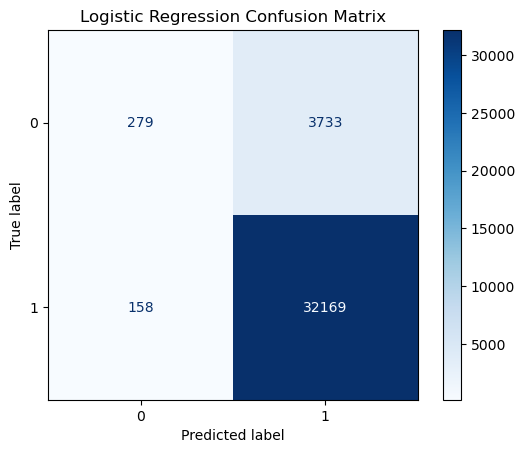

In [80]:
# Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr).astype(int)  # convert to int
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=[0, 1])
disp_lr.plot(cmap=plt.cm.Blues)
plt.title("Logistic Regression Confusion Matrix")
plt.show()


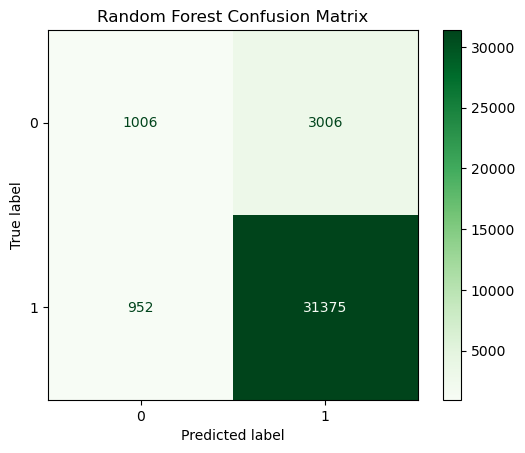

In [81]:
# Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rfc).astype(int)  # convert to int
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=[0, 1])
disp_rf.plot(cmap=plt.cm.Greens)
plt.title("Random Forest Confusion Matrix")
plt.show()
